# Developing Alternatives to VaR (Value-at-Risk)

| Name            | Email                          |
|-----------------|--------------------------------|
| Rohit Singh     | rohitkumar.singh7885@gmail.com |
| Sahil Shinde    | sahil311292@gmail.com          |
| Shantanu Mishra | 8hantanu@gmail.com             |

## Pre-requisites

### Install packages

In [1]:
!pip install yfinance
!pip install pandas_datareader

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yf
import tqdm
import math
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')
yf.pdr_override()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Import data 
Data from year 2000 to 2020 for treasury yields for 1, 5, and 10 years

### US treasury bonds rates for 1 year yields

In [3]:
treasury_1y = pdr.get_data_yahoo('^IRX', start='2010-01-01', end='2020-12-31')
treasury_1y.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.08,0.08,0.05,0.05,0.05,0
2010-01-05,0.06,0.06,0.04,0.06,0.06,0
2010-01-06,0.06,0.06,0.05,0.05,0.05,0
2010-01-07,0.05,0.05,0.04,0.05,0.05,0
2010-01-08,0.05,0.05,0.04,0.04,0.04,0


### US treasury bonds rates for 5 years yields

In [4]:
treasury_5y = pdr.get_data_yahoo('^FVX', start='2010-01-01', end='2020-12-31')
treasury_5y.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2.68,2.68,2.63,2.65,2.65,0
2010-01-05,2.58,2.59,2.55,2.56,2.56,0
2010-01-06,2.57,2.62,2.56,2.57,2.57,0
2010-01-07,2.62,2.64,2.57,2.60,2.60,0
2010-01-08,2.64,2.65,2.53,2.57,2.57,0


### US treasury bonds rates for 10 years yields

In [5]:
treasury_10y = pdr.get_data_yahoo('^TNX', start='2010-01-01', end='2020-12-31')
treasury_10y.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,3.86,3.86,3.81,3.84,3.84,0
2010-01-05,3.79,3.80,3.75,3.76,3.76,0
2010-01-06,3.77,3.84,3.76,3.81,3.81,0
2010-01-07,3.85,3.86,3.80,3.82,3.82,0
2010-01-08,3.84,3.85,3.78,3.81,3.81,0


In [6]:
# Gather equity data from 2002-2022
sp500 = pdr.DataReader(['^GSPC'], start = '2002-01-01', end = '2022-12-31')
sp500.to_csv("/Users/sahil/Study/MScFE/Capstone Project 2/mscfe_690/Data/sp500.csv")
sp500.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,1148.08,1154.67,1136.23,1154.67,1154.67,1171000000
2002-01-03,1154.67,1165.27,1154.01,1165.27,1165.27,1398900000
2002-01-04,1165.27,1176.55,1163.42,1172.51,1172.51,1513000000
2002-01-07,1172.51,1176.97,1163.55,1164.89,1164.89,1308300000
2002-01-08,1164.89,1167.60,1157.46,1160.71,1160.71,1258800000


In [7]:
apple = pdr.DataReader(['AAPL'], start = '2002-01-01', end = '2022-12-31')
apple.to_csv("/Users/sahil/Study/MScFE/Capstone Project 2/mscfe_690/Data/apple.csv")
apple.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,0.39,0.42,0.39,0.42,0.35,529496800
2002-01-03,0.41,0.42,0.41,0.42,0.36,612007200
2002-01-04,0.42,0.43,0.41,0.42,0.36,409976000
2002-01-07,0.42,0.43,0.41,0.41,0.35,444584000
2002-01-08,0.41,0.41,0.40,0.40,0.34,450038400


In [8]:
microsoft = pdr.DataReader(['MSFT'], start = '2002-01-01', end = '2022-12-31')
microsoft.to_csv("/Users/sahil/Study/MScFE/Capstone Project 2/mscfe_690/Data/microsoft.csv")
microsoft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,33.33,33.56,32.76,33.52,20.87,48124000
2002-01-03,33.56,34.62,33.54,34.62,21.55,67590800
2002-01-04,34.62,34.96,34.33,34.45,21.45,52731400
2002-01-07,34.88,35.01,34.17,34.28,21.34,58508800
2002-01-08,34.35,34.93,34.00,34.69,21.60,47736400


In [9]:
sgx = pdr.DataReader(['S68.SI'], start = '2002-01-01', end = '2022-12-31')
sgx.to_csv("/Users/sahil/Study/MScFE/Capstone Project 2/mscfe_690/Data/sgx.csv")
sgx.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-01,1.24,1.24,1.24,1.24,0.41,0
2002-01-02,1.23,1.23,1.15,1.21,0.40,8008000
2002-01-03,1.21,1.21,1.21,1.21,0.40,0
2002-01-04,1.26,1.27,1.24,1.25,0.41,5809000
2002-01-07,1.26,1.28,1.26,1.27,0.42,4219000


In [10]:
dollartree = pdr.DataReader(['DLTR'], start = '2002-01-01', end = '2022-12-31')
dollartree.to_csv("/Users/sahil/Study/MScFE/Capstone Project 2/mscfe_690/Data/dollartree.csv")
dollartree.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,10.33,10.43,10.08,10.20,10.20,1978200
2002-01-03,10.20,10.25,9.95,10.12,10.12,3203700
2002-01-04,10.15,10.25,9.99,10.07,10.07,4050900
2002-01-07,10.00,10.40,9.64,9.91,9.91,5038200
2002-01-08,9.95,9.96,9.48,9.53,9.53,6130500


### Calculate the daily returns

In [11]:
# Calculate daily returns for treasury yields
treasury_1y['daily_return'] = treasury_1y['Adj Close'].pct_change()
treasury_5y['daily_return'] = treasury_5y['Adj Close'].pct_change()
treasury_10y['daily_return'] = treasury_10y['Adj Close'].pct_change()

# Drop missing values
treasury_1y.dropna(inplace=True)
treasury_5y.dropna(inplace=True)
treasury_10y.dropna(inplace=True)



## Metrics

### Value at Risk (VaR)

In [12]:
def calculate_var(df, confidence_level=0.99):
    """
    Calculate Value at Risk (VaR) for a given confidence level and time horizon
    """
    
    sorted_returns = df.sort_values('daily_return')
    var = -sorted_returns['daily_return'].quantile(1-confidence_level)

    return var

# Calculate VaR round for 1 year treasury yield with 99% confidence level
var_1y = calculate_var(treasury_1y, 0.99)
print(f'Value at Risk for 1 year treasury yield with 99% confidence level is {var_1y:.3f}')

# Calculate VaR for 5 year treasury yield with 99% confidence level
var_5y = calculate_var(treasury_5y, 0.99)
print(f'Value at Risk for 5 year treasury yield with 99% confidence level is {var_5y:.3f}')

# Calculate VaR for 10 year treasury yield with 99% confidence level
var_10y = calculate_var(treasury_10y, 0.99)
print(f'Value at Risk for 10 year treasury yield with 99% confidence level is {var_10y:.3f}')


Value at Risk for 1 year treasury yield with 99% confidence level is 0.698
Value at Risk for 5 year treasury yield with 99% confidence level is 0.105
Value at Risk for 10 year treasury yield with 99% confidence level is 0.071


### Expected Shortfall (ES)

In [13]:
# Compute ES for a 10 day liquidity horizon based on Basel IV norms which uses a 97.5% confidence level
def calculate_es(df, confidence_level=0.975, time_horizon=10):
    """
    Calculate Expected Shortfall (ES) for a given confidence level and time horizon
    """
    
    sorted_returns = df.sort_values('daily_return')
    var = sorted_returns['daily_return'].quantile(1-confidence_level)
    es = -sorted_returns[sorted_returns['daily_return'] <= var]['daily_return'].mean()
    
    return es

# Calculate ES for 1 year treasury yield with 97.5% confidence level
es_1y = calculate_es(treasury_1y, 0.975)
print(f'Expected Shortfall for 1 year treasury yield with 97.5% confidence level is {es_1y:.3f}')

# Calculate ES for 5 year treasury yield with 97.5% confidence level
es_5y = calculate_es(treasury_5y, 0.975)
print(f'Expected Shortfall for 5 year treasury yield with 97.5% confidence level is {es_5y:.3f}')

# Calculate ES for 10 year treasury yield with 97.5% confidence level
es_10y = calculate_es(treasury_10y, 0.975)
print(f'Expected Shortfall for 10 year treasury yield with 97.5% confidence level is {es_10y:.3f}')


Expected Shortfall for 1 year treasury yield with 97.5% confidence level is 0.765
Expected Shortfall for 5 year treasury yield with 97.5% confidence level is 0.113
Expected Shortfall for 10 year treasury yield with 97.5% confidence level is 0.082


### ES based on Differentiated Liquidity Horizon (ESD)

In [14]:
def calculate_es_with_liquidity_horizon(df, confidence_level=0.975):

    time_horizon = [10, 20, 40, 60, 120]
    es_arr = []
    es_scaled_arr = []

    for i, horizon in enumerate(time_horizon):
        es = calculate_es(df, confidence_level, horizon)
        if i != 0:
            es_scaled = es * np.sqrt((time_horizon[i] - time_horizon[i-1]) / 10)
        else:
            es_scaled = es
        es_arr.append(es)
        es_scaled_arr.append(es_scaled)

    es_b = np.sqrt(np.sum(np.square(es_scaled_arr)))

    return es_b

# Calculate ESD for 1 year treasury yield with 97.5% confidence level
esd_1y = calculate_es_with_liquidity_horizon(treasury_1y, 0.975)
print(f'Expected Shortfall for 1 year treasury yield with 97.5% confidence level is {esd_1y:.3f}')

# Calculate ESD for 5 year treasury yield with 97.5% confidence level
esd_5y = calculate_es_with_liquidity_horizon(treasury_5y, 0.975)
print(f'Expected Shortfall for 5 year treasury yield with 97.5% confidence level is {esd_5y:.3f}')

# Calculate ESD for 10 year treasury yield with 97.5% confidence level
esd_10y = calculate_es_with_liquidity_horizon(treasury_10y, 0.975)
print(f'Expected Shortfall for 10 year treasury yield with 97.5% confidence level is {esd_10y:.3f}')


Expected Shortfall for 1 year treasury yield with 97.5% confidence level is 2.650
Expected Shortfall for 5 year treasury yield with 97.5% confidence level is 0.393
Expected Shortfall for 10 year treasury yield with 97.5% confidence level is 0.285


### ES based on Spectral Risk Measure (ESS)

In [15]:
# TODO:
def calculate_spectralRisk_ES(df, confidence_level=0.975):
    """
    Calculate Expected Shortfall (ES) for a given confidence level and time horizon
    """
    
    sorted_returns = df.sort_values('daily_return')
    var = sorted_returns['daily_return'].quantile(1-confidence_level)
    es = sorted_returns[sorted_returns['daily_return'] <= var]['daily_return']
    df = pd.DataFrame(es.values, columns=['var_excess_vals'])
    df = df.sort_values('var_excess_vals')
    df['rownum'] = range(1, df.shape[0] + 1)

    ess = -(df['var_excess_vals'] * df['rownum']).sum()/df['rownum'].sum()
    
    return ess

def calculate_nday_ess(df, confidence_level=0.99, period = 1):
    """
    Calculate Value at Risk (VaR) for a given confidence level and time horizon
    """
    #df.reset_index(inplace=True)
    df['var'] = np.nan
    for i in tqdm.tqdm(range(df.shape[0] - period)):
        
        var = calculate_spectralRisk_ES(df.iloc[i:period+i,:])
        df.loc[period+i,'var'] = var
        #print(i+period,var)

    return df



# Calculate ESD for 1 year treasury yield with 97.5% confidence level
ess_1y = calculate_spectralRisk_ES(treasury_1y, 0.975)
print(f'Expected Shortfall for 1 year treasury yield with 97.5% confidence level is {ess_1y:.3f}')

# Calculate ESD for 5 year treasury yield with 97.5% confidence level
ess_5y = calculate_spectralRisk_ES(treasury_5y, 0.975)
print(f'Expected Shortfall for 5 year treasury yield with 97.5% confidence level is {ess_5y:.3f}')

# Calculate ESD for 10 year treasury yield with 97.5% confidence level
ess_10y = calculate_spectralRisk_ES(treasury_10y, 0.975)
print(f'Expected Shortfall for 10 year treasury yield with 97.5% confidence level is {ess_10y:.3f}')

Expected Shortfall for 1 year treasury yield with 97.5% confidence level is 0.575
Expected Shortfall for 5 year treasury yield with 97.5% confidence level is 0.091
Expected Shortfall for 10 year treasury yield with 97.5% confidence level is 0.063


In [16]:
class portfolio:
    def __init__(self, tickers, period):
        self.tickers = tickers
        self.period = period



    def closing_price(self):
        data = pdr.get_data_yahoo(self.tickers, start = self.period[0], end=self.period[1])['Adj Close']
        
        return data
    
    def portfolio_cost(self,weights):
        closing_prices = self.closing_price()
        cost = (weights*closing_prices).sum(axis=1)
        closing_prices['portfolio total'] = cost

        return closing_prices

In [17]:
class risk_measures:
    def __init__(self,window):
        self.window = window


    def var(self,series, confidence_level):
        series = list(series)
        series.sort()
        var = np.quantile(series,1-confidence_level)

        return var
    

    def expected_shortfall(self, series, confidence_level):
        series = list(series)
        series.sort()
        var = np.quantile(series, 1-confidence_level)
        es = np.mean([x for x in series if x <= var])

        return es
    

    def expected_shortfall_with_liquidity_horizon(self, series, confidence_level):
        time_horizon = [10, 20, 40, 60, 120]
        es_arr = []
        es_scaled_arr = []

        for i, horizon in enumerate(time_horizon):
            es = self.expected_shortfall(series, confidence_level)
            if i != 0:
                es_scaled = es * np.sqrt((time_horizon[i] - time_horizon[i-1]) / 10)
            else:
                es_scaled = es
            es_arr.append(es)
            es_scaled_arr.append(es_scaled)

        es_b = np.sqrt(np.sum(np.square(es_scaled_arr)))

        return es_b
        

    def expected_shortfall_with_spectral_risk(self, series, confidence_level):
        series = list(series)
        series.sort()
        var = np.quantile(series, 1-confidence_level)
        es = [x for x in series if x <= var]
        df = pd.DataFrame(es, columns=['var_excess_vals'])
        df = df.sort_values('var_excess_vals')
        df['rownum'] = range(1, df.shape[0] + 1)

        ess = (df['var_excess_vals'] * df['rownum']).sum()/df['rownum'].sum()

        return ess


    def window_riskMetric(self, series, confidence_level, risk_metric, colname):

        window = self.window
        series = list(series)
        df = pd.DataFrame(series, columns=['value'])
        df['index'] = list(range(df.shape[0]))
        df.set_index('index')
        df[colname] = np.nan

        for i in tqdm.tqdm(range(df.shape[0] - window)):

            rm = risk_metric(df.iloc[i:window+i,:]['value'], confidence_level)
            df.loc[window+i,colname] = rm
            #print(i+period,var)

        return df

In [18]:
# Define methods to calculate Option Greeks


def d1(S, K, T, r, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) /\
                     sigma*np.sqrt(T)

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma* np.sqrt(T)

def delta_call(S, K, T, r, sigma):
    N = norm.cdf
    return N(d1(S, K, T, r, sigma))
    

    
def delta_put(S, K, T, r, sigma):
    N = norm.cdf
    return - N(-d1(S, K, T, r, sigma))

def gamma(S, K, T, r, sigma):
    N_prime = norm.pdf
    return N_prime(d1(S,K, T, r, sigma))/(S*sigma*np.sqrt(T))/100


def vega(S, K, T, r, sigma):
    N_prime = norm.pdf
    return S*np.sqrt(T)*N_prime(d1(S,K,T,r,sigma))/100


### Define the securities and gather data

In [19]:
p1 = portfolio(['^GSPC','AAPL','MSFT','S68.SI'], ['2002-01-01','2022-12-31'])
portfolio1 = p1.closing_price()
portfolio1.head(), portfolio1.tail()

[*********************100%***********************]  4 of 4 completed


(            AAPL  MSFT  S68.SI   ^GSPC
 Date                                  
 2002-01-01   NaN   NaN    0.41     NaN
 2002-01-02  0.35 20.87    0.40 1154.67
 2002-01-03  0.36 21.55    0.40 1165.27
 2002-01-04  0.36 21.45    0.41 1172.51
 2002-01-07  0.35 21.34    0.42 1164.89,
              AAPL   MSFT  S68.SI   ^GSPC
 Date                                    
 2022-12-23 131.48 237.61    8.83 3844.82
 2022-12-27 129.65 235.85    8.84 3829.25
 2022-12-28 125.67 233.43    8.80 3783.22
 2022-12-29 129.23 239.88    8.78 3849.28
 2022-12-30 129.55 238.70    8.80 3839.50)

In [20]:
# Add US Treasury rate data
Tbill_1yr = pdr.get_data_yahoo("^IRX", '2002-01-01','2022-12-31')
Tbill_1yr.head(),Tbill_1yr.tail()

[*********************100%***********************]  1 of 1 completed


(            Open  High  Low  Close  Adj Close  Volume
 Date                                                 
 2002-01-02  1.70  1.70 1.69   1.70       1.70       0
 2002-01-03  1.69  1.69 1.67   1.69       1.69       0
 2002-01-04  1.70  1.70 1.68   1.68       1.68       0
 2002-01-07  1.67  1.67 1.66   1.66       1.66       0
 2002-01-08  1.64  1.66 1.63   1.65       1.65       0,
             Open  High  Low  Close  Adj Close  Volume
 Date                                                 
 2022-12-23  4.20  4.21 4.18   4.19       4.19       0
 2022-12-27  4.20  4.22 4.15   4.20       4.20       0
 2022-12-28  4.34  4.34 4.33   4.34       4.34       0
 2022-12-29  4.33  4.33 4.30   4.30       4.30       0
 2022-12-30  4.30  4.30 4.22   4.26       4.26       0)

In [21]:
# Add VIX Volatility data
vix = pd.read_csv("/Users/sahil/Study/MScFE/Capstone Project 2/VIX_History.csv")
vix['DATE'] = pd.to_datetime(vix['DATE'])
vix = vix[(vix['DATE'] >= '2002-01-01') & (vix['DATE'] <= '2022-12-31')]
vix.head(), vix.tail()

(           DATE  OPEN  HIGH   LOW  CLOSE
 3024 2002-01-02 23.78 24.20 22.71  22.71
 3025 2002-01-03 22.22 22.43 21.33  21.34
 3026 2002-01-04 20.97 21.53 20.40  20.45
 3027 2002-01-07 21.41 22.15 21.35  21.94
 3028 2002-01-08 21.63 22.29 21.28  21.83,
            DATE  OPEN  HIGH   LOW  CLOSE
 8311 2022-12-23 22.17 22.64 20.78  20.87
 8312 2022-12-27 21.67 22.80 21.59  21.65
 8313 2022-12-28 21.47 22.26 20.96  22.14
 8314 2022-12-29 22.25 22.31 21.36  21.44
 8315 2022-12-30 21.83 22.40 21.59  21.67)

In [22]:
price_data = pd.merge(portfolio1,Tbill_1yr[['Adj Close']], left_on=portfolio1.index, right_on=Tbill_1yr.index)
price_data['Date'] = pd.to_datetime(price_data.key_0)
price_data = pd.merge(price_data, vix['CLOSE'], left_on='Date', right_on=vix.DATE)
price_data = price_data.rename(columns={'Adj Close':'US 1yr Tbill', 'CLOSE': 'VIX', 'S68.SI':'SGX', '^GSPC':'S&P500'})
price_data = price_data[['Date','AAPL','MSFT','SGX', 'S&P500','US 1yr Tbill', 'VIX']]
price_data['US 1yr Tbill'] = price_data['US 1yr Tbill']/100
price_data['VIX'] = price_data['VIX']/100
price_data.head(), price_data.tail()

(        Date  AAPL  MSFT  SGX  S&P500  US 1yr Tbill  VIX
 0 2002-01-02  0.35 20.87 0.40 1154.67          0.02 0.23
 1 2002-01-03  0.36 21.55 0.40 1165.27          0.02 0.21
 2 2002-01-04  0.36 21.45 0.41 1172.51          0.02 0.20
 3 2002-01-07  0.35 21.34 0.42 1164.89          0.02 0.22
 4 2002-01-08  0.34 21.60 0.42 1160.71          0.02 0.22,
            Date   AAPL   MSFT  SGX  S&P500  US 1yr Tbill  VIX
 5274 2022-12-23 131.48 237.61 8.83 3844.82          0.04 0.21
 5275 2022-12-27 129.65 235.85 8.84 3829.25          0.04 0.22
 5276 2022-12-28 125.67 233.43 8.80 3783.22          0.04 0.22
 5277 2022-12-29 129.23 239.88 8.78 3849.28          0.04 0.21
 5278 2022-12-30 129.55 238.70 8.80 3839.50          0.04 0.22)

### Logarithmic 1 day, 10 day & 20 day returns

In [23]:
# Compute 1 day change
returns_data = np.log(price_data[['AAPL','MSFT','SGX', 'S&P500']]) - np.log(price_data[['AAPL','MSFT','SGX', 'S&P500']].shift(1))
returns_data.columns = ["1day "+x+" change" for x in returns_data.columns]
returns_data['1day rate change'] = price_data['US 1yr Tbill'].diff(periods=1)
returns_data['1day Vol change'] = price_data['VIX'].diff(periods=1)

# Compute 10 day change
returns_10day_data = np.log(price_data[['AAPL','MSFT','SGX', 'S&P500']]) - np.log(price_data[['AAPL','MSFT','SGX', 'S&P500']].shift(10))
returns_10day_data.columns = ["10day "+x+" change" for x in returns_10day_data.columns]
returns_10day_data['10day rate change'] = price_data['US 1yr Tbill'].diff(periods=10)
returns_10day_data['10day Vol change'] = price_data['VIX'].diff(periods=10)

# Compute 20 day change
returns_20day_data = np.log(price_data[['AAPL','MSFT','SGX', 'S&P500']]) - np.log(price_data[['AAPL','MSFT','SGX', 'S&P500']].shift(20))
returns_20day_data.columns = ["20day "+x+" change" for x in returns_20day_data.columns]
returns_20day_data['20day rate change'] = price_data['US 1yr Tbill'].diff(periods=20)
returns_20day_data['20day Vol change'] = price_data['VIX'].diff(periods=20)

returns_data = pd.concat([returns_data, returns_10day_data], axis=1)
returns_data = pd.concat([returns_data, returns_20day_data], axis=1)
returns_data.head(25)

,1day AAPL change,1day MSFT change,1day SGX change,1day S&P500 change,1day rate change,1day Vol change,10day AAPL change,10day MSFT change,10day SGX change,10day S&P500 change,10day rate change,10day Vol change,20day AAPL change,20day MSFT change,20day SGX change,20day S&P500 change,20day rate change,20day Vol change
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,0.03,0.00,0.01,-0.00,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,-0.00,0.03,0.01,-0.00,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.03,-0.00,0.02,-0.01,-0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.01,0.01,0.01,-0.00,-0.00,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.04,-0.01,-0.02,-0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.02,0.01,0.02,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.01,-0.01,0.02,-0.01,-0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.00,-0.00,0.02,-0.01,-0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.03,0.02,0.00,0.01,0.00,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Define securities portfolio

# 10000 Call options with S&P500 index as underlying security
# 20000 Call options with AAPLE stock as underlying security
# 15000 Put options with S&P500 index as underlying security
# 20000 MICROSOFT stocks
# Futures with SGX as underlying security
# 10000 1 year US T bill

security_portfolio = {}
security_portfolio[0] = {'Position':'Long', 'Qty':10000, 'Instrument': 'Call', 'Underlying': 'S&P500', 'Maturity':'1 Year', 'Underlying Spot Value':price_data['S&P500'].iloc[-1], 'Strike':3000}
security_portfolio[1] = {'Position':'Long', 'Qty':20000, 'Instrument': 'Stock', 'Underlying': 'APPLE', 'Maturity':'NA', 'Underlying Spot Value':price_data['AAPL'].iloc[-1], 'Strike':np.nan}
security_portfolio[2] = {'Position':'Short', 'Qty':15000, 'Instrument': 'Put', 'Underlying': 'S&P500', 'Maturity':'2 Year', 'Underlying Spot Value':price_data['S&P500'].iloc[-1], 'Strike':3500}
security_portfolio[3] = {'Position':'Long', 'Qty':20000, 'Instrument': 'Stock', 'Underlying': 'MICROSOFT', 'Maturity':'NA', 'Underlying Spot Value':price_data['MSFT'].iloc[-1], 'Strike':np.nan}
security_portfolio[4] = {'Position':'Long', 'Qty':10000, 'Instrument': 'Index Future', 'Underlying': 'SGX Futures', 'Maturity':'1 Year', 'Underlying Spot Value':price_data['SGX'].iloc[-1], 'Strike':np.nan}
security_portfolio[5] = {'Position':'Long', 'Qty':10000, 'Instrument': 'Bond', 'Underlying': 'US 1 Year rates', 'Maturity':'1 Year', 'Underlying Spot Value':price_data['US 1yr Tbill'].iloc[-1], 'Strike':np.nan}
security_portfolio = pd.DataFrame.from_dict(security_portfolio,'index')
security_portfolio

,Position,Qty,Instrument,Underlying,Maturity,Underlying Spot Value,Strike
0,Long,10000,Call,S&P500,1 Year,3839.50,3000.00
1,Long,20000,Stock,APPLE,NA,129.55,NaN
2,Short,15000,Put,S&P500,2 Year,3839.50,3500.00
3,Long,20000,Stock,MICROSOFT,NA,238.70,NaN
4,Long,10000,Index Future,SGX Futures,1 Year,8.80,NaN
5,Long,10000,Bond,US 1 Year rates,1 Year,0.04,NaN


In [25]:
security_portfolio['Delta'] = np.nan
security_portfolio['Delta'][0] = delta_call(float(security_portfolio['Underlying Spot Value'][0]),
                                            float(security_portfolio['Strike'][0]),
                                            T=1, r=price_data['US 1yr Tbill'].iloc[-1]/100,
                                            sigma=price_data['VIX'].iloc[-1]/100)*security_portfolio['Qty'][0]

security_portfolio['Delta'][1] = 1*security_portfolio['Qty'][1]
security_portfolio['Delta'][2] = delta_put(float(security_portfolio['Underlying Spot Value'][2]),
                                           float(security_portfolio['Strike'][2]),
                                           T=1, r=price_data['US 1yr Tbill'].iloc[-1],
                                            sigma=price_data['VIX'].iloc[-1])*security_portfolio['Qty'][2]
security_portfolio['Delta'][3] = 1*security_portfolio['Qty'][3]
security_portfolio['Delta'][4] = 1*security_portfolio['Qty'][4]
security_portfolio['Delta'][5] = -1*math.exp(-price_data['US 1yr Tbill'].iloc[-1])*security_portfolio['Qty'][5]
security_portfolio

,Position,Qty,Instrument,Underlying,Maturity,Underlying Spot Value,Strike,Delta
0,Long,10000,Call,S&P500,1 Year,3839.50,3000.00,10000.00
1,Long,20000,Stock,APPLE,NA,129.55,NaN,20000.00
2,Short,15000,Put,S&P500,2 Year,3839.50,3500.00,-3480.54
3,Long,20000,Stock,MICROSOFT,NA,238.70,NaN,20000.00
4,Long,10000,Index Future,SGX Futures,1 Year,8.80,NaN,10000.00
5,Long,10000,Bond,US 1 Year rates,1 Year,0.04,NaN,-9582.95


In [26]:
security_portfolio['Gamma'] = np.nan
security_portfolio['Gamma'][0] = gamma(float(security_portfolio['Underlying Spot Value'][0]),
                                            float(security_portfolio['Strike'][0]),
                                            T=1, r=price_data['US 1yr Tbill'].iloc[-1],
                                            sigma=price_data['VIX'].iloc[-1])*security_portfolio['Qty'][0]

security_portfolio['Gamma'][1] = 0
security_portfolio['Gamma'][3] = 0
security_portfolio['Gamma'][4] = 0
security_portfolio['Gamma'][5] = 0
security_portfolio

,Position,Qty,Instrument,Underlying,Maturity,Underlying Spot Value,Strike,Delta,Gamma
0,Long,10000,Call,S&P500,1 Year,3839.50,3000.00,10000.00,0.02
1,Long,20000,Stock,APPLE,NA,129.55,NaN,20000.00,0.00
2,Short,15000,Put,S&P500,2 Year,3839.50,3500.00,-3480.54,NaN
3,Long,20000,Stock,MICROSOFT,NA,238.70,NaN,20000.00,0.00
4,Long,10000,Index Future,SGX Futures,1 Year,8.80,NaN,10000.00,0.00
5,Long,10000,Bond,US 1 Year rates,1 Year,0.04,NaN,-9582.95,0.00


In [27]:
security_portfolio['Vega'] = np.nan
security_portfolio['Vega'][0] = vega(float(security_portfolio['Underlying Spot Value'][0]),
                                            float(security_portfolio['Strike'][0]),
                                            T=1, r=price_data['US 1yr Tbill'].iloc[-1],
                                            sigma=price_data['VIX'].iloc[-1])*security_portfolio['Qty'][0]

security_portfolio['Vega'][1] = 0
security_portfolio['Vega'][2] = -vega(float(security_portfolio['Underlying Spot Value'][2]),
                                           float(security_portfolio['Strike'][2]),
                                           T=1, r=price_data['US 1yr Tbill'].iloc[-1],
                                            sigma=price_data['VIX'].iloc[-1])*security_portfolio['Qty'][2]
security_portfolio['Vega'][3] = 0
security_portfolio['Vega'][4] = 0
security_portfolio['Vega'][5] = 0
security_portfolio

,Position,Qty,Instrument,Underlying,Maturity,Underlying Spot Value,Strike,Delta,Gamma,Vega
0,Long,10000,Call,S&P500,1 Year,3839.50,3000.00,10000.00,0.02,54039.14
1,Long,20000,Stock,APPLE,NA,129.55,NaN,20000.00,0.00,0.00
2,Short,15000,Put,S&P500,2 Year,3839.50,3500.00,-3480.54,NaN,-175740.99
3,Long,20000,Stock,MICROSOFT,NA,238.70,NaN,20000.00,0.00,0.00
4,Long,10000,Index Future,SGX Futures,1 Year,8.80,NaN,10000.00,0.00,0.00
5,Long,10000,Bond,US 1 Year rates,1 Year,0.04,NaN,-9582.95,0.00,0.00


### Profit/Loss for different securities

In [28]:
pnl_table = pd.DataFrame()
pnl_table['Call_S&P500_1day_return'] = (returns_data['1day S&P500 change']*security_portfolio['Delta'][0]) + ((returns_data['1day Vol change'])*security_portfolio['Vega'][0])
pnl_table['Stock_AAPL_1day_return'] = security_portfolio['Delta'][1]*returns_data['10day AAPL change']
pnl_table['Put_S&P500_1day_return'] = ((returns_data['1day S&P500 change']*security_portfolio['Delta'][2]) + ((returns_data['1day Vol change'])*security_portfolio['Vega'][2]))
pnl_table['Stock_MSFT_1day_return'] = security_portfolio['Delta'][3]*returns_data['1day MSFT change']
pnl_table['Futures_SGX_1day_return'] = security_portfolio['Delta'][4]*returns_data['1day SGX change']
pnl_table['Bond_tbill_1day_return'] = (security_portfolio['Delta'][5]*(returns_data['1day rate change']))

pnl_table['Call_S&P500_10day_return'] = (returns_data['10day S&P500 change']*security_portfolio['Delta'][0]) + ((returns_data['10day Vol change'])*security_portfolio['Vega'][0])
pnl_table['Stock_AAPL_10day_return'] = security_portfolio['Delta'][1]*returns_data['10day AAPL change']
pnl_table['Put_S&P500_10day_return'] = ((returns_data['10day S&P500 change']*security_portfolio['Delta'][2]) + ((returns_data['10day Vol change'])*security_portfolio['Vega'][2]))
pnl_table['Stock_MSFT_10day_return'] = security_portfolio['Delta'][3]*returns_data['10day MSFT change']
pnl_table['Futures_SGX_10day_return'] = security_portfolio['Delta'][4]*returns_data['10day SGX change']
pnl_table['Bond_tbill_10day_return'] = (security_portfolio['Delta'][5]*(returns_data['10day rate change']))

pnl_table['Total 1day PnL'] = pnl_table[['Call_S&P500_1day_return','Stock_AAPL_1day_return','Put_S&P500_1day_return','Stock_MSFT_1day_return','Futures_SGX_1day_return','Bond_tbill_1day_return']].sum(axis=1)
pnl_table['Total 10day PnL'] = pnl_table[['Call_S&P500_10day_return','Stock_AAPL_10day_return','Put_S&P500_10day_return','Stock_MSFT_10day_return','Futures_SGX_10day_return','Bond_tbill_10day_return']].sum(axis=1)

pnl_table['Total 20day PnL'] = (returns_data['20day Vol change'])*(security_portfolio['Vega'][0] + security_portfolio['Vega'][2])
pnl_table.head(25)

,Call_S&P500_1day_return,Stock_AAPL_1day_return,Put_S&P500_1day_return,Stock_MSFT_1day_return,Futures_SGX_1day_return,Bond_tbill_1day_return,Call_S&P500_10day_return,Stock_AAPL_10day_return,Put_S&P500_10day_return,Stock_MSFT_10day_return,Futures_SGX_10day_return,Bond_tbill_10day_return,Total 1day PnL,Total 10day PnL,Total 20day PnL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN
1,-648.95,NaN,2375.85,642.90,0.00,0.96,NaN,NaN,NaN,NaN,NaN,NaN,2370.75,0.00,NaN
2,-419.01,NaN,1542.54,-95.56,325.23,0.96,NaN,NaN,NaN,NaN,NaN,NaN,1354.16,0.00,NaN
3,739.98,NaN,-2595.85,-98.94,158.73,1.92,NaN,NaN,NaN,NaN,NaN,NaN,-1794.16,0.00,NaN
4,-95.39,NaN,205.83,237.78,78.43,0.96,NaN,NaN,NaN,NaN,NaN,NaN,427.61,0.00,NaN
5,114.01,NaN,-510.48,-194.07,-237.17,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,-827.71,0.00,NaN
6,136.49,NaN,-408.45,165.22,237.17,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,130.43,0.00,NaN
7,34.56,NaN,-388.67,-194.36,155.04,5.75,NaN,NaN,NaN,NaN,NaN,NaN,-387.67,0.00,NaN
8,466.62,NaN,-1700.35,-40.85,152.68,4.79,NaN,NaN,NaN,NaN,NaN,NaN,-1117.11,0.00,NaN
9,-407.44,NaN,1522.82,313.01,0.00,-1.92,NaN,NaN,NaN,NaN,NaN,NaN,1426.47,0.00,NaN


### DAILY RETURNS PORTFOLIO
### VaR, ESF and ESS on Portfolio PnL

In [29]:
# Compute different risk measures on portfolio PnL
rm = risk_measures(window=252)
Portfolio_risk_threshold = pd.DataFrame()
Portfolio_risk_threshold['Date'] = price_data['Date']
Portfolio_risk_threshold['Total PnL'] = pnl_table['Total 1day PnL']
Portfolio_risk_threshold['Total 20day PnL'] = pnl_table['Total 20day PnL']


# 252 Day window VaR @99% calculation
Portfolio_risk_threshold['VaR 99%'] = rm.window_riskMetric(Portfolio_risk_threshold['Total PnL'],0.99,rm.var, 'VaR')['VaR']
Portfolio_risk_threshold['VaR 99% Breach'] = Portfolio_risk_threshold['Total PnL'] < Portfolio_risk_threshold['VaR 99%']

# 252 Day window ESF @97.5% calculation
Portfolio_risk_threshold['ESF 97.5%'] = rm.window_riskMetric(Portfolio_risk_threshold['Total PnL'],0.975,rm.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold['ESF 97.5% Breach'] = Portfolio_risk_threshold['Total PnL'] < Portfolio_risk_threshold['ESF 97.5%']

# 252 Day window ESS @97.5% calculation
Portfolio_risk_threshold['ESS 97.5%'] = rm.window_riskMetric(Portfolio_risk_threshold['Total PnL'],0.975,rm.expected_shortfall_with_spectral_risk, 'ESS')['ESS']
Portfolio_risk_threshold['ESS 97.5% Breach'] = Portfolio_risk_threshold['Total PnL'] < Portfolio_risk_threshold['ESS 97.5%']

# 252 Day window Regulatory ESF @97.5% calculation
Portfolio_risk_threshold['20day ESF 97.5%'] = rm.window_riskMetric(Portfolio_risk_threshold['Total 20day PnL'],0.975,rm.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold['Regulatory ESF 97.5%'] = -np.sqrt((Portfolio_risk_threshold['ESF 97.5%']**2) + (Portfolio_risk_threshold['20day ESF 97.5%']**2))
Portfolio_risk_threshold['Regulatory ESF 97.5% Breach'] = Portfolio_risk_threshold['Total PnL'] < Portfolio_risk_threshold['Regulatory ESF 97.5%']
Portfolio_risk_threshold.head(10)

100%|██████████| 5027/5027 [00:01<00:00, 2714.79it/s]


,Date,Total PnL,Total 20day PnL,VaR 99%,VaR 99% Breach,ESF 97.5%,ESF 97.5% Breach,ESS 97.5%,ESS 97.5% Breach,20day ESF 97.5%,Regulatory ESF 97.5%,Regulatory ESF 97.5% Breach
0,2002-01-02,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
1,2002-01-03,2370.75,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
2,2002-01-04,1354.16,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
3,2002-01-07,-1794.16,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
4,2002-01-08,427.61,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
5,2002-01-09,-827.71,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
6,2002-01-10,130.43,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
7,2002-01-11,-387.67,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
8,2002-01-14,-1117.11,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
9,2002-01-15,1426.47,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False


In [30]:
VaR_breach_rate = round((Portfolio_risk_threshold['VaR 99% Breach'].sum()/Portfolio_risk_threshold['VaR 99% Breach'].count())*100,2)
print("Portfolio breaches 99% VaR threshold "+str(VaR_breach_rate)+"% of the times.")

ESF_breach_rate = round((Portfolio_risk_threshold['ESF 97.5% Breach'].sum()/Portfolio_risk_threshold['ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESF threshold "+str(ESF_breach_rate)+"% of the times.")

ESS_breach_rate = round((Portfolio_risk_threshold['ESS 97.5% Breach'].sum()/Portfolio_risk_threshold['ESS 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESS threshold "+str(ESS_breach_rate)+"% of the times.")

Reg_ESF_breach_rate = round((Portfolio_risk_threshold['Regulatory ESF 97.5% Breach'].sum()/Portfolio_risk_threshold['Regulatory ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% Regulatory ESF threshold "+str(Reg_ESF_breach_rate)+"% of the times.")

Portfolio breaches 99% VaR threshold 1.61% of the times.
Portfolio breaches 97.5% ESF threshold 1.38% of the times.
Portfolio breaches 97.5% ESS threshold 1.84% of the times.
Portfolio breaches 97.5% Regulatory ESF threshold 0.21% of the times.


### 10 DAY RETURNS PORTFOLIO
### VaR, ESF and ESS on Portfolio PnL

In [31]:
# Compute different risk measures on portfolio PnL
rm = risk_measures(window=252)
Portfolio_risk_threshold_10day = pd.DataFrame()
Portfolio_risk_threshold_10day['Date'] = price_data['Date']
Portfolio_risk_threshold_10day['Total PnL'] = pnl_table['Total 10day PnL']
Portfolio_risk_threshold_10day['Total 20day PnL'] = pnl_table['Total 20day PnL']


# 252 Day window VaR @99% calculation
Portfolio_risk_threshold_10day['VaR 99%'] = rm.window_riskMetric(Portfolio_risk_threshold_10day['Total PnL'],0.99,rm.var, 'VaR')['VaR']
Portfolio_risk_threshold_10day['VaR 99% Breach'] = Portfolio_risk_threshold_10day['Total PnL'] < Portfolio_risk_threshold_10day['VaR 99%']

# 252 Day window ESF @97.5% calculation
Portfolio_risk_threshold_10day['ESF 97.5%'] = rm.window_riskMetric(Portfolio_risk_threshold_10day['Total PnL'],0.975,rm.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold_10day['ESF 97.5% Breach'] = Portfolio_risk_threshold_10day['Total PnL'] < Portfolio_risk_threshold_10day['ESF 97.5%']

# 252 Day window ESS @97.5% calculation
Portfolio_risk_threshold_10day['ESS 97.5%'] = rm.window_riskMetric(Portfolio_risk_threshold_10day['Total PnL'],0.975,rm.expected_shortfall_with_spectral_risk, 'ESS')['ESS']
Portfolio_risk_threshold_10day['ESS 97.5% Breach'] = Portfolio_risk_threshold_10day['Total PnL'] < Portfolio_risk_threshold_10day['ESS 97.5%']

# 252 Day window Regulatory ESF @97.5% calculation
Portfolio_risk_threshold_10day['20day ESF 97.5%'] = rm.window_riskMetric(Portfolio_risk_threshold_10day['Total 20day PnL'],0.975,rm.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold_10day['Regulatory ESF 97.5%'] = -np.sqrt((Portfolio_risk_threshold_10day['ESF 97.5%']**2) + (Portfolio_risk_threshold_10day['20day ESF 97.5%']**2))
Portfolio_risk_threshold_10day['Regulatory ESF 97.5% Breach'] = Portfolio_risk_threshold_10day['Total PnL'] < Portfolio_risk_threshold_10day['Regulatory ESF 97.5%']
Portfolio_risk_threshold_10day.head(10)

100%|██████████| 5027/5027 [00:01<00:00, 2722.58it/s]


,Date,Total PnL,Total 20day PnL,VaR 99%,VaR 99% Breach,ESF 97.5%,ESF 97.5% Breach,ESS 97.5%,ESS 97.5% Breach,20day ESF 97.5%,Regulatory ESF 97.5%,Regulatory ESF 97.5% Breach
0,2002-01-02,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
1,2002-01-03,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
2,2002-01-04,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
3,2002-01-07,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
4,2002-01-08,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
5,2002-01-09,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
6,2002-01-10,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
7,2002-01-11,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
8,2002-01-14,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
9,2002-01-15,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False


In [32]:
VaR_breach_rate_10day = round((Portfolio_risk_threshold_10day['VaR 99% Breach'].sum()/Portfolio_risk_threshold_10day['VaR 99% Breach'].count())*100,2)
print("Portfolio breaches 99% VaR threshold "+str(VaR_breach_rate_10day)+"% of the times.")

ESF_breach_rate_10day = round((Portfolio_risk_threshold_10day['ESF 97.5% Breach'].sum()/Portfolio_risk_threshold_10day['ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESF threshold "+str(ESF_breach_rate_10day)+"% of the times.")

ESS_breach_rate_10day = round((Portfolio_risk_threshold_10day['ESS 97.5% Breach'].sum()/Portfolio_risk_threshold_10day['ESS 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESS threshold "+str(ESS_breach_rate_10day)+"% of the times.")

Reg_ESF_breach_rate_10day = round((Portfolio_risk_threshold_10day['Regulatory ESF 97.5% Breach'].sum()/Portfolio_risk_threshold_10day['Regulatory ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% Regulatory ESF threshold "+str(Reg_ESF_breach_rate_10day)+"% of the times.")

Portfolio breaches 99% VaR threshold 1.95% of the times.
Portfolio breaches 97.5% ESF threshold 1.82% of the times.
Portfolio breaches 97.5% ESS threshold 2.27% of the times.
Portfolio breaches 97.5% Regulatory ESF threshold 0.63% of the times.


### Signal to Noise Ratio

In [33]:
## Compute Signal to Noise ratio
n = 252         # Time window
p_var = 0.01        # Confidence Interval for VaR
p_esf = 0.025
mean = n*p_var
var = n*p_var*(1-p_var)
signal_to_noise_ratio = round(mean/np.sqrt(var),2)
print("Signal to Noise ratio based on 99% VaR is ", str(signal_to_noise_ratio))

# Based on Signal to noise ratio, the appropriate window for Expected Shortfall calculation is as follows:
n_revised = (signal_to_noise_ratio**2*(1-p_esf)/p_esf)
print("Based on Signal to Noise ratio, appropriate window for Expected Shortfall is ", str(math.ceil(n_revised)))

Signal to Noise ratio based on 99% VaR is  1.6
Based on Signal to Noise ratio, appropriate window for Expected Shortfall is  100


### DAILY RETURNS
### Based on S/N ratio, revised ESF is as follows

In [34]:
# Compute different risk measures on portfolio PnL
rm_revised = risk_measures(window=100)
Portfolio_risk_threshold_revised = pd.DataFrame()
Portfolio_risk_threshold_revised['Date'] = price_data['Date']
Portfolio_risk_threshold_revised['Total PnL'] = pnl_table['Total 1day PnL']
Portfolio_risk_threshold_revised['Total 20day PnL'] = pnl_table['Total 20day PnL']


# 252 Day window VaR @99% calculation
Portfolio_risk_threshold_revised['VaR 99%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised['Total PnL'],0.99,rm_revised.var, 'VaR')['VaR']
Portfolio_risk_threshold_revised['VaR 99% Breach'] = Portfolio_risk_threshold_revised['Total PnL'] < Portfolio_risk_threshold_revised['VaR 99%']

# 252 Day window ESF @97.5% calculation
Portfolio_risk_threshold_revised['ESF 97.5%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised['Total PnL'],0.975,rm_revised.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold_revised['ESF 97.5% Breach'] = Portfolio_risk_threshold_revised['Total PnL'] < Portfolio_risk_threshold_revised['ESF 97.5%']

# 252 Day window ESS @97.5% calculation
Portfolio_risk_threshold_revised['ESS 97.5%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised['Total PnL'],0.975,rm_revised.expected_shortfall_with_spectral_risk, 'ESS')['ESS']
Portfolio_risk_threshold_revised['ESS 97.5% Breach'] = Portfolio_risk_threshold_revised['Total PnL'] < Portfolio_risk_threshold_revised['ESS 97.5%']

# 252 Day window Regulatory ESF @97.5% calculation
Portfolio_risk_threshold_revised['20day ESF 97.5%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised['Total 20day PnL'],0.975,rm_revised.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold_revised['Regulatory ESF 97.5%'] = -np.sqrt((Portfolio_risk_threshold_revised['ESF 97.5%']**2) + (Portfolio_risk_threshold_revised['20day ESF 97.5%']**2))
Portfolio_risk_threshold_revised['Regulatory ESF 97.5% Breach'] = Portfolio_risk_threshold_revised['Total PnL'] < Portfolio_risk_threshold_revised['Regulatory ESF 97.5%']
Portfolio_risk_threshold_revised

100%|██████████| 5179/5179 [00:01<00:00, 3087.90it/s]


,Date,Total PnL,Total 20day PnL,VaR 99%,VaR 99% Breach,ESF 97.5%,ESF 97.5% Breach,ESS 97.5%,ESS 97.5% Breach,20day ESF 97.5%,Regulatory ESF 97.5%,Regulatory ESF 97.5% Breach
0,2002-01-02,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
1,2002-01-03,2370.75,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
2,2002-01-04,1354.16,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
3,2002-01-07,-1794.16,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
4,2002-01-08,427.61,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5274,2022-12-23,-158.30,-450.30,-6448.82,False,-5908.94,False,-5563.83,False,-10259.47,-11839.43,False
5275,2022-12-27,-3222.53,681.53,-6448.82,False,-5908.94,False,-5563.83,False,-10259.47,-11839.43,False
5276,2022-12-28,-3807.05,-304.25,-6448.82,False,-5908.94,False,-5563.83,False,-10259.47,-11839.43,False
5277,2022-12-29,-504.03,-1046.64,-6448.82,False,-5908.94,False,-5563.83,False,-10259.47,-11839.43,False


In [35]:
ESF_breach_rate_rev = round((Portfolio_risk_threshold_revised['ESF 97.5% Breach'].sum()/Portfolio_risk_threshold_revised['ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESF threshold "+str(ESF_breach_rate_rev)+"% of the times.")

ESS_breach_rate_rev = round((Portfolio_risk_threshold_revised['ESS 97.5% Breach'].sum()/Portfolio_risk_threshold_revised['ESS 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESS threshold "+str(ESS_breach_rate_rev)+"% of the times.")

Reg_ESF_breach_rate_rev = round((Portfolio_risk_threshold_revised['Regulatory ESF 97.5% Breach'].sum()/Portfolio_risk_threshold_revised['Regulatory ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% Regulatory ESF threshold "+str(Reg_ESF_breach_rate_rev)+"% of the times.")

Portfolio breaches 97.5% ESF threshold 2.1% of the times.
Portfolio breaches 97.5% ESS threshold 2.58% of the times.
Portfolio breaches 97.5% Regulatory ESF threshold 0.45% of the times.


### 10 DAY RETURNS
### Based on S/N ratio, revised ESF is as follows

In [36]:
# Compute different risk measures on portfolio PnL
rm_revised = risk_measures(window=100)
Portfolio_risk_threshold_revised_10day = pd.DataFrame()
Portfolio_risk_threshold_revised_10day['Date'] = price_data['Date']
Portfolio_risk_threshold_revised_10day['Total PnL'] = pnl_table['Total 10day PnL']
Portfolio_risk_threshold_revised_10day['Total 20day PnL'] = pnl_table['Total 20day PnL']


# 252 Day window VaR @99% calculation
Portfolio_risk_threshold_revised_10day['VaR 99%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised_10day['Total PnL'],0.99,rm_revised.var, 'VaR')['VaR']
Portfolio_risk_threshold_revised_10day['VaR 99% Breach'] = Portfolio_risk_threshold_revised_10day['Total PnL'] < Portfolio_risk_threshold_revised_10day['VaR 99%']

# 252 Day window ESF @97.5% calculation
Portfolio_risk_threshold_revised_10day['ESF 97.5%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised_10day['Total PnL'],0.975,rm_revised.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold_revised_10day['ESF 97.5% Breach'] = Portfolio_risk_threshold_revised_10day['Total PnL'] < Portfolio_risk_threshold_revised_10day['ESF 97.5%']

# 252 Day window ESS @97.5% calculation
Portfolio_risk_threshold_revised_10day['ESS 97.5%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised_10day['Total PnL'],0.975,rm_revised.expected_shortfall_with_spectral_risk, 'ESS')['ESS']
Portfolio_risk_threshold_revised_10day['ESS 97.5% Breach'] = Portfolio_risk_threshold_revised_10day['Total PnL'] < Portfolio_risk_threshold_revised_10day['ESS 97.5%']

# 252 Day window Regulatory ESF @97.5% calculation
Portfolio_risk_threshold_revised_10day['20day ESF 97.5%'] = rm_revised.window_riskMetric(Portfolio_risk_threshold_revised_10day['Total 20day PnL'],0.975,rm_revised.expected_shortfall, 'ESF')['ESF']
Portfolio_risk_threshold_revised_10day['Regulatory ESF 97.5%'] = -np.sqrt((Portfolio_risk_threshold_revised_10day['ESF 97.5%']**2) + (Portfolio_risk_threshold_revised_10day['20day ESF 97.5%']**2))
Portfolio_risk_threshold_revised_10day['Regulatory ESF 97.5% Breach'] = Portfolio_risk_threshold_revised_10day['Total PnL'] < Portfolio_risk_threshold_revised_10day['Regulatory ESF 97.5%']
Portfolio_risk_threshold_revised_10day.head(10)

100%|██████████| 5179/5179 [00:01<00:00, 2849.17it/s]


,Date,Total PnL,Total 20day PnL,VaR 99%,VaR 99% Breach,ESF 97.5%,ESF 97.5% Breach,ESS 97.5%,ESS 97.5% Breach,20day ESF 97.5%,Regulatory ESF 97.5%,Regulatory ESF 97.5% Breach
0,2002-01-02,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
1,2002-01-03,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
2,2002-01-04,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
3,2002-01-07,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
4,2002-01-08,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
5,2002-01-09,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
6,2002-01-10,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
7,2002-01-11,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
8,2002-01-14,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False
9,2002-01-15,0.00,NaN,NaN,False,NaN,False,NaN,False,NaN,NaN,False


In [37]:
ESF_breach_rate_rev = round((Portfolio_risk_threshold_revised_10day['ESF 97.5% Breach'].sum()/Portfolio_risk_threshold_revised_10day['ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESF threshold "+str(ESF_breach_rate_rev)+"% of the times.")

ESS_breach_rate_rev = round((Portfolio_risk_threshold_revised_10day['ESS 97.5% Breach'].sum()/Portfolio_risk_threshold_revised_10day['ESS 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% ESS threshold "+str(ESS_breach_rate_rev)+"% of the times.")

Reg_ESF_breach_rate_rev = round((Portfolio_risk_threshold_revised_10day['Regulatory ESF 97.5% Breach'].sum()/Portfolio_risk_threshold_revised_10day['Regulatory ESF 97.5% Breach'].count())*100,2)
print("Portfolio breaches 97.5% Regulatory ESF threshold "+str(Reg_ESF_breach_rate_rev)+"% of the times.")

Portfolio breaches 97.5% ESF threshold 2.97% of the times.
Portfolio breaches 97.5% ESS threshold 3.33% of the times.
Portfolio breaches 97.5% Regulatory ESF threshold 1.06% of the times.


## Plots and Graphs

In [38]:
Portfolio_risk_threshold = Portfolio_risk_threshold.set_index('Date')

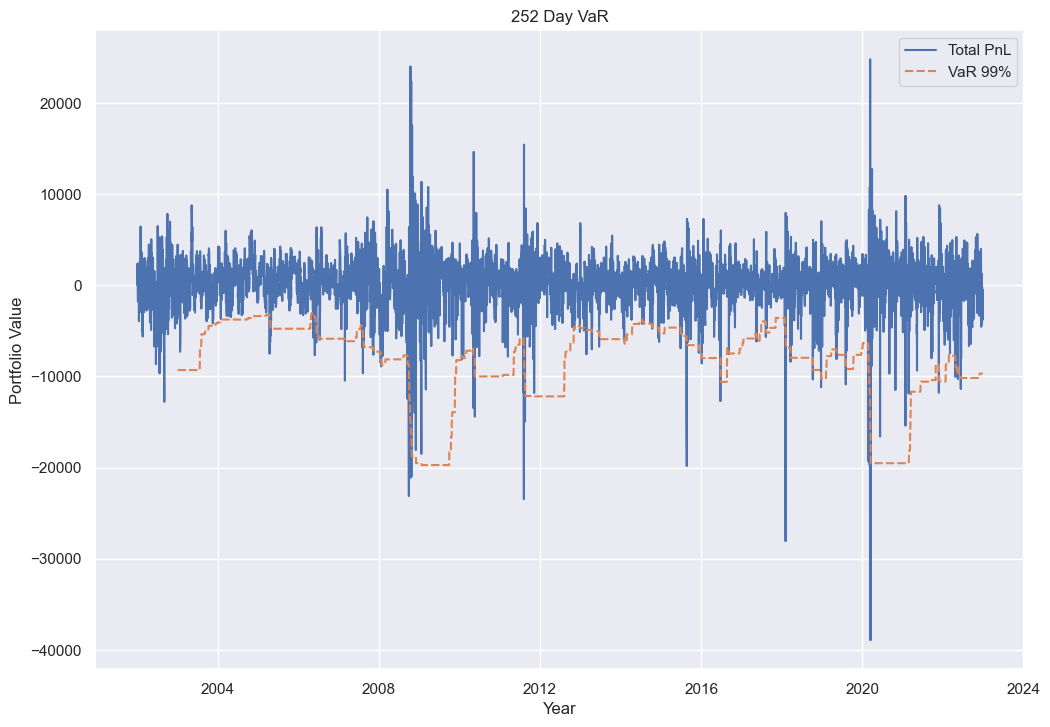

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8.3)})

varplot = sns.lineplot(data = Portfolio_risk_threshold[['Total PnL', 'VaR 99%']], legend='full').set(title='252 Day VaR',ylabel='Portfolio Value',xlabel='Year')

[Text(0.5, 1.0, '252 Day ESF'),
 Text(0, 0.5, 'Portfolio Value'),
 Text(0.5, 0, 'Year')]

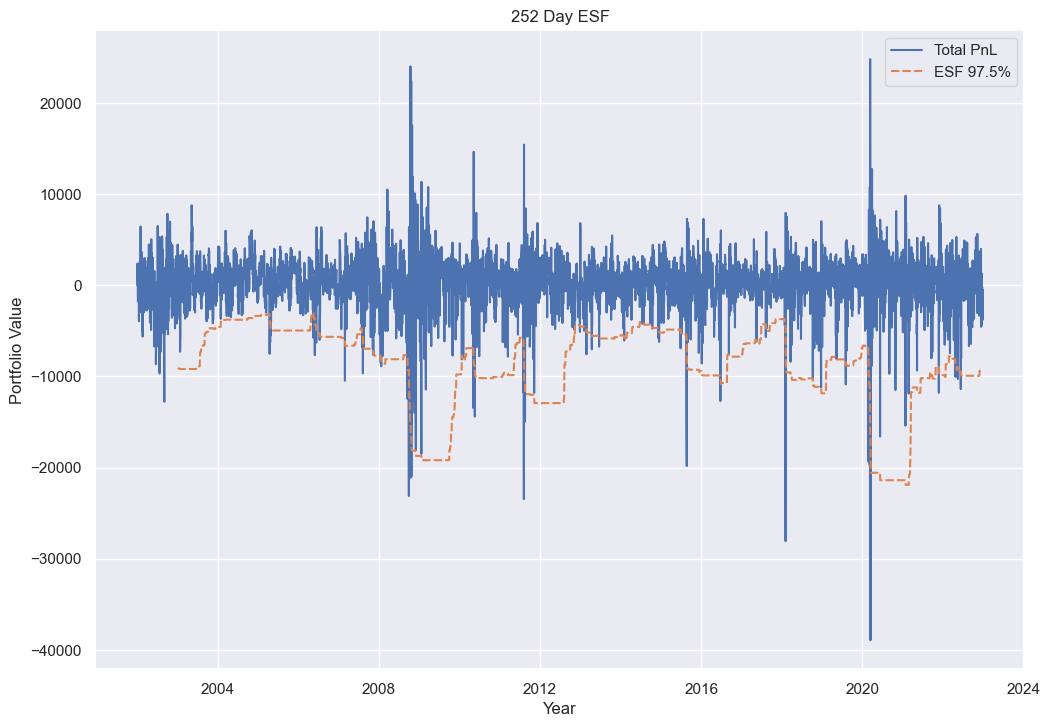

In [40]:

sns.lineplot(data = Portfolio_risk_threshold[['Total PnL', 'ESF 97.5%']], legend='full').set(title='252 Day ESF',ylabel='Portfolio Value',xlabel='Year')


[Text(0.5, 1.0, '252 Day ESS'),
 Text(0, 0.5, 'Portfolio Value'),
 Text(0.5, 0, 'Year')]

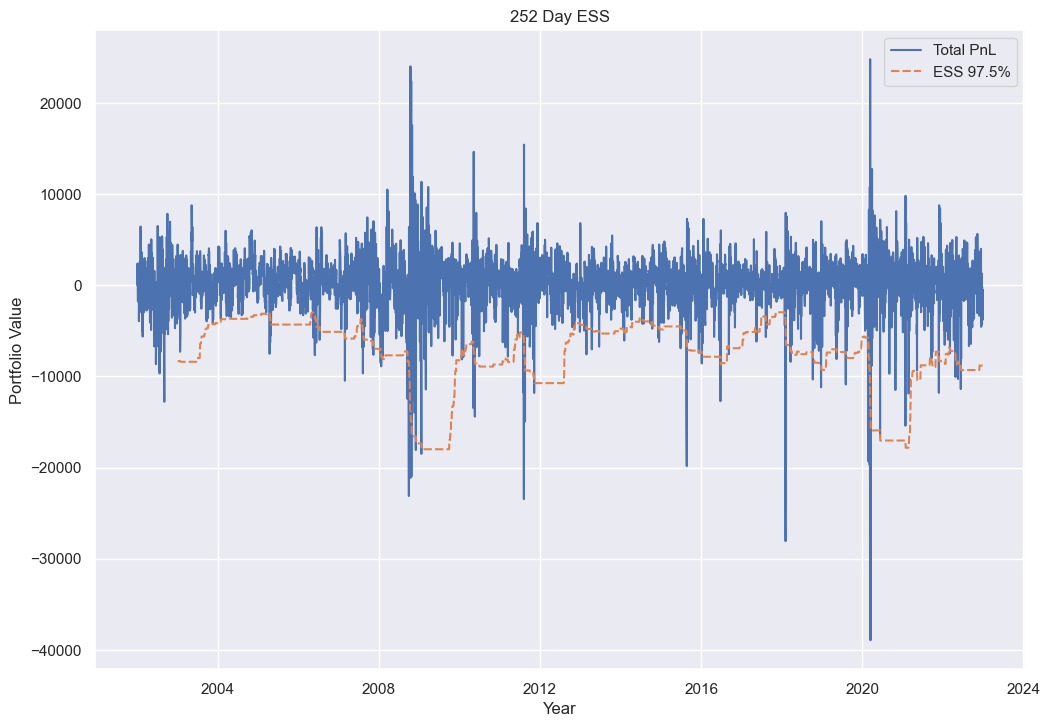

In [41]:
sns.lineplot(data = Portfolio_risk_threshold[['Total PnL', 'ESS 97.5%']], legend='full').set(title='252 Day ESS',ylabel='Portfolio Value',xlabel='Year')

[Text(0.5, 1.0, '252 Day Regulatory ESF'),
 Text(0, 0.5, 'Portfolio Value'),
 Text(0.5, 0, 'Year')]

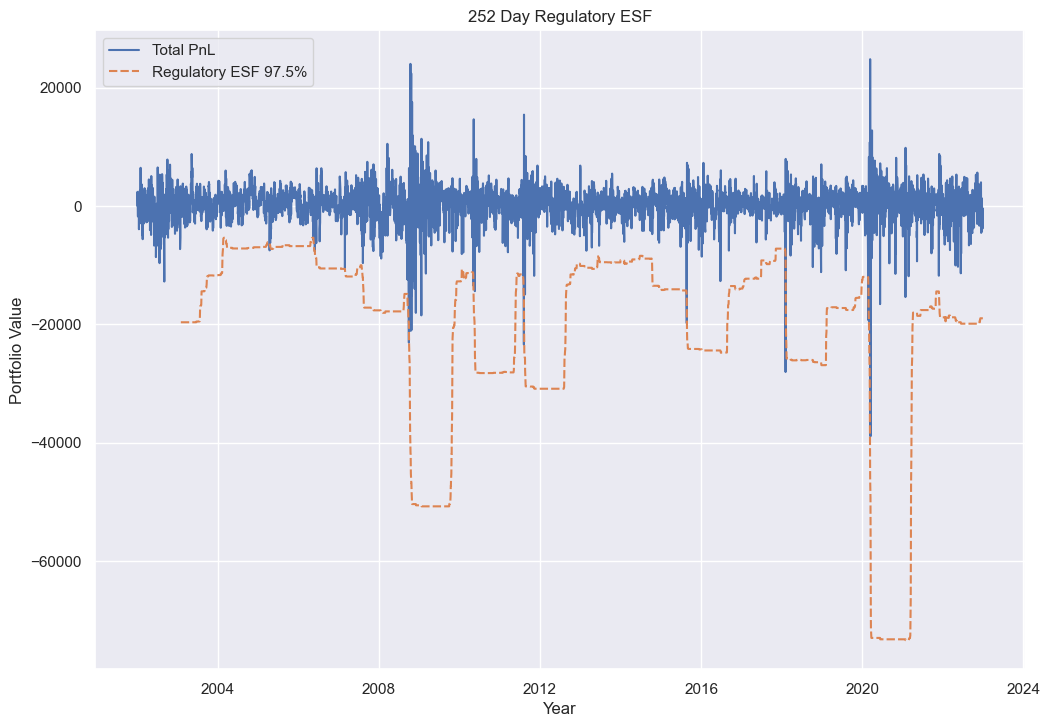

In [42]:
sns.lineplot(data = Portfolio_risk_threshold[['Total PnL', 'Regulatory ESF 97.5%']], legend='full').set(title='252 Day Regulatory ESF',ylabel='Portfolio Value',xlabel='Year')

[Text(0.5, 1.0, '252 Day measures performance comparison'),
 Text(0, 0.5, 'Risk Threshold'),
 Text(0.5, 0, 'Year')]

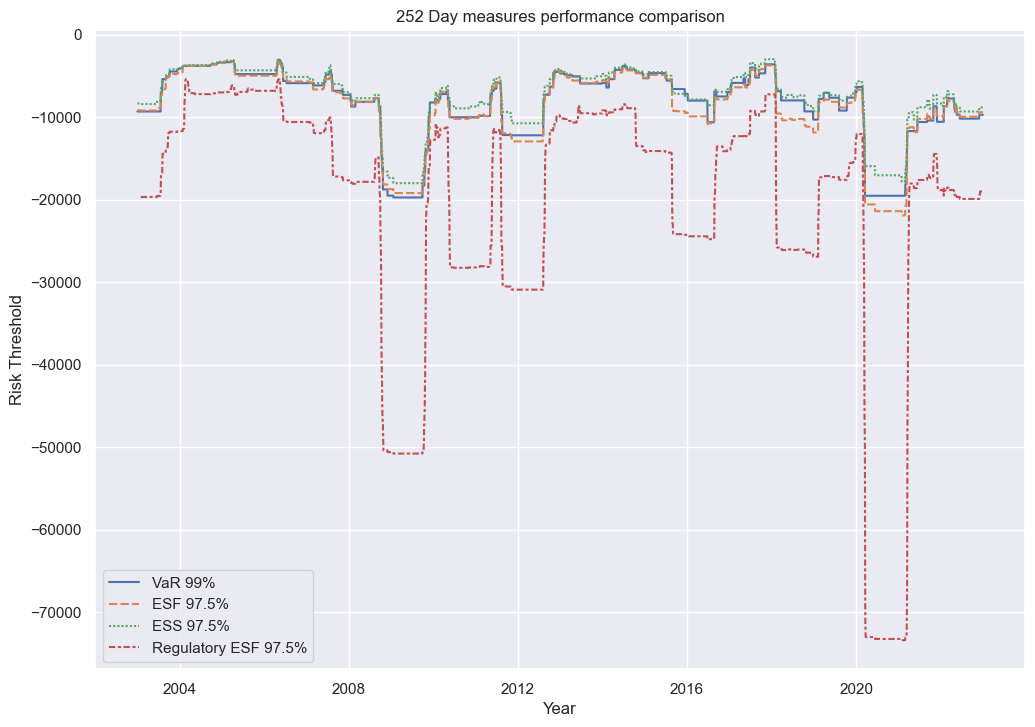

In [43]:
sns.lineplot(data = Portfolio_risk_threshold[['VaR 99%','ESF 97.5%','ESS 97.5%','Regulatory ESF 97.5%']], legend='full').set(title='252 Day measures performance comparison',ylabel='Risk Threshold',xlabel='Year')

In [44]:
Portfolio_risk_threshold_revised = Portfolio_risk_threshold_revised.set_index('Date')

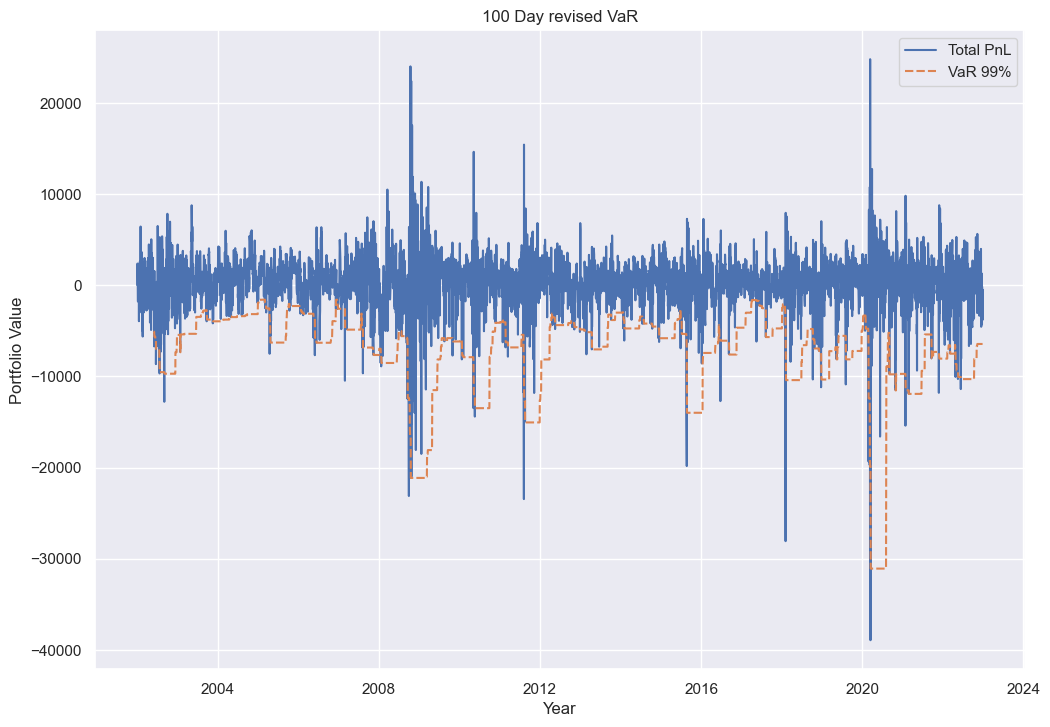

In [45]:
varplot = sns.lineplot(data = Portfolio_risk_threshold_revised[['Total PnL', 'VaR 99%']], legend='full').set(title='100 Day revised VaR',ylabel='Portfolio Value',xlabel='Year')

[Text(0.5, 1.0, '100 Day revised ESF'),
 Text(0, 0.5, 'Portfolio Value'),
 Text(0.5, 0, 'Year')]

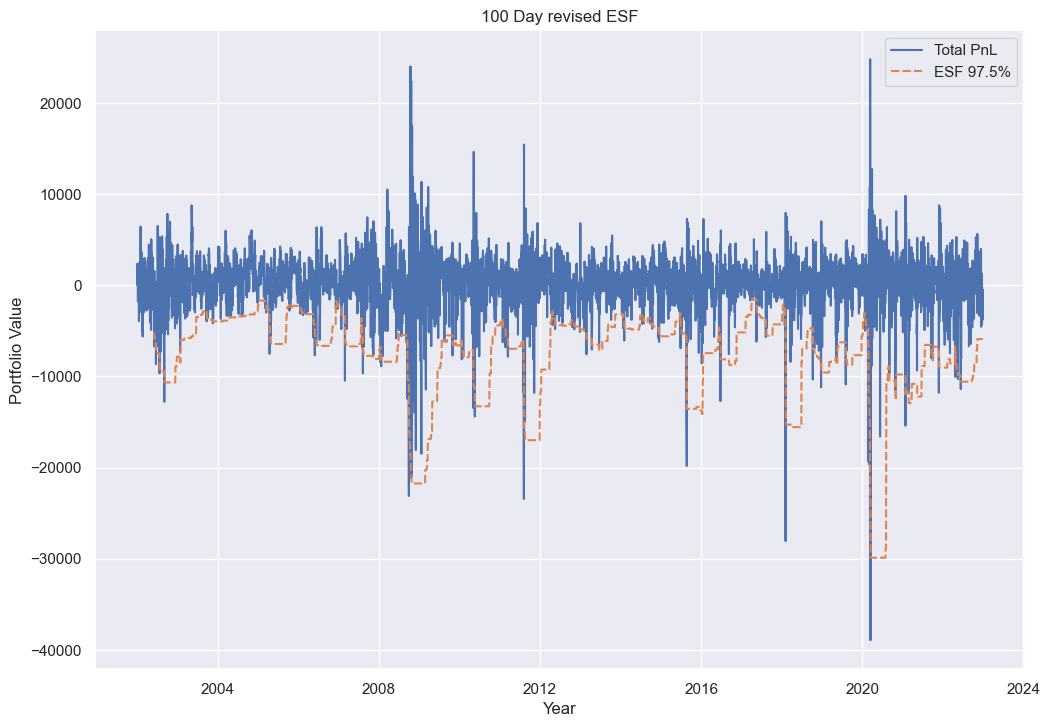

In [46]:

sns.lineplot(data = Portfolio_risk_threshold_revised[['Total PnL', 'ESF 97.5%']], legend='full').set(title='100 Day revised ESF',ylabel='Portfolio Value',xlabel='Year')


[Text(0.5, 1.0, '100 Day revised ESS'),
 Text(0, 0.5, 'Portfolio Value'),
 Text(0.5, 0, 'Year')]

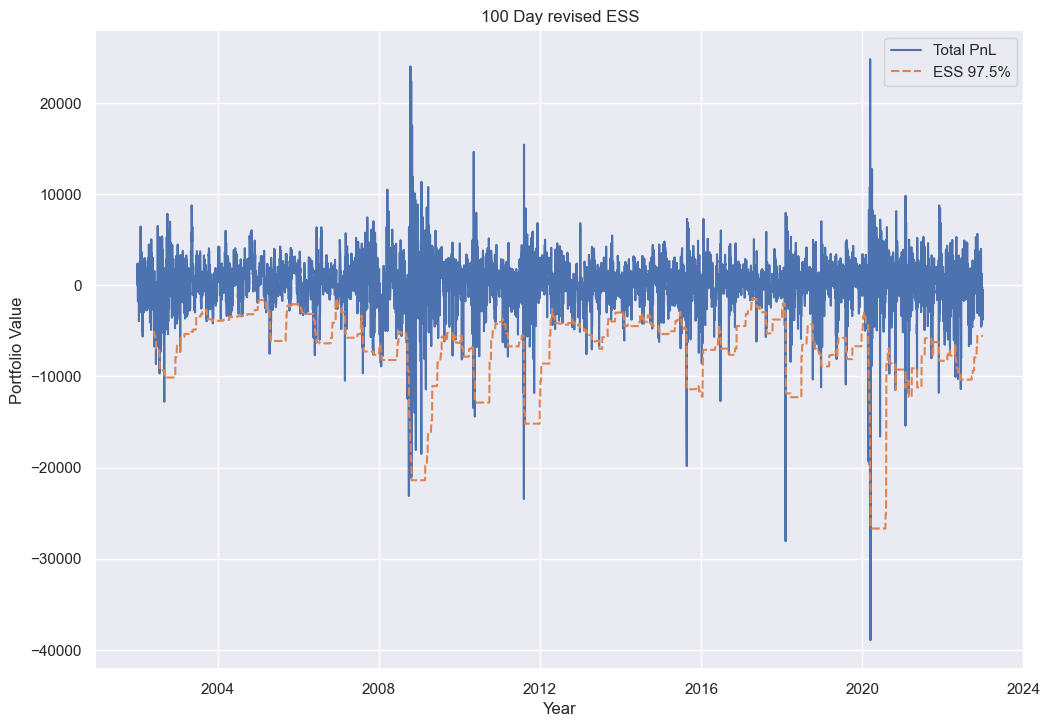

In [47]:
sns.lineplot(data = Portfolio_risk_threshold_revised[['Total PnL', 'ESS 97.5%']], legend='full').set(title='100 Day revised ESS',ylabel='Portfolio Value',xlabel='Year')

[Text(0.5, 1.0, '100 Day revised Regulatory ESF'),
 Text(0, 0.5, 'Portfolio Value'),
 Text(0.5, 0, 'Year')]

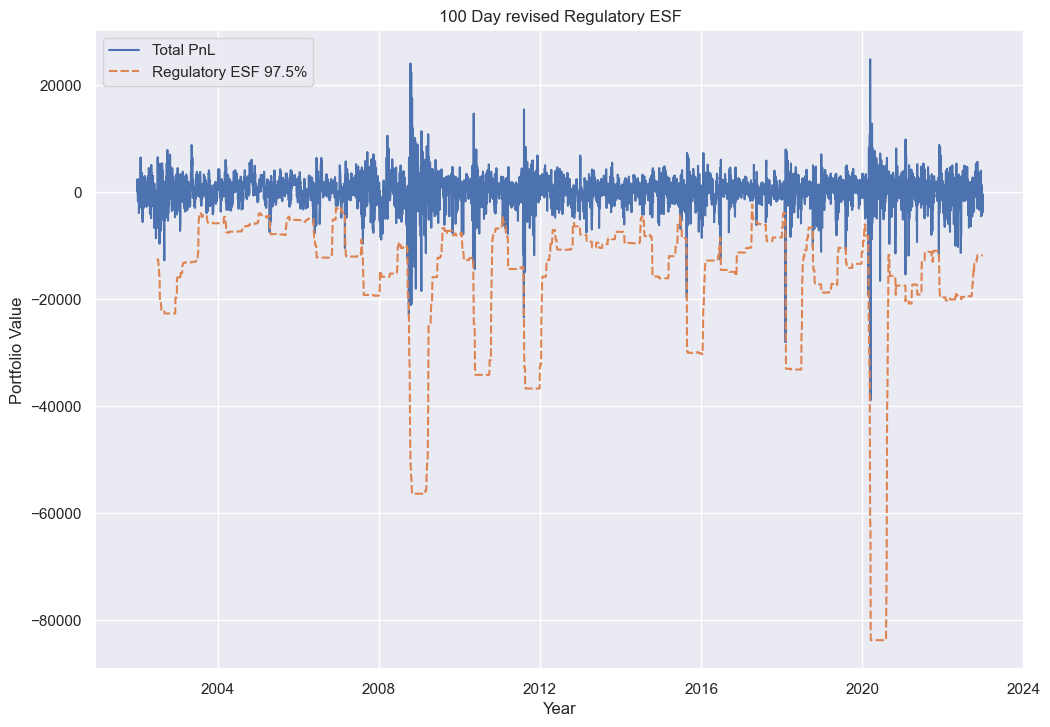

In [48]:
sns.lineplot(data = Portfolio_risk_threshold_revised[['Total PnL', 'Regulatory ESF 97.5%']], legend='full').set(title='100 Day revised Regulatory ESF',ylabel='Portfolio Value',xlabel='Year')

[Text(0.5, 1.0, '100 Day revised measures performance comparison'),
 Text(0, 0.5, 'Risk Threshold'),
 Text(0.5, 0, 'Year')]

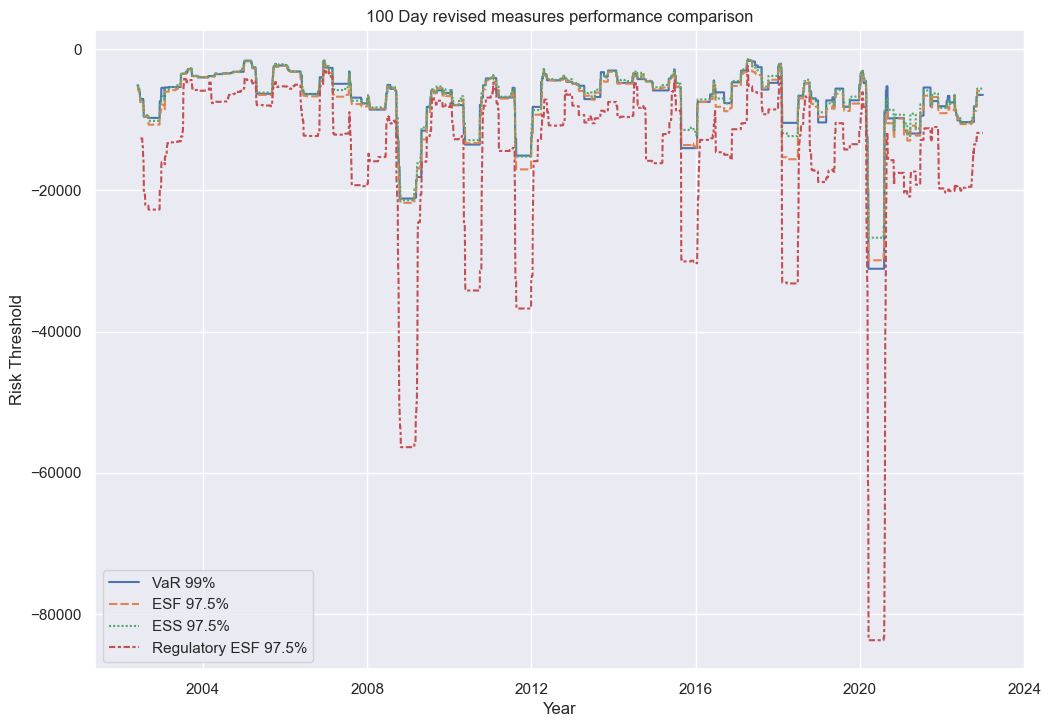

In [49]:
sns.lineplot(data = Portfolio_risk_threshold_revised[['VaR 99%','ESF 97.5%','ESS 97.5%','Regulatory ESF 97.5%']], legend='full').set(title='100 Day revised measures performance comparison',ylabel='Risk Threshold',xlabel='Year')